In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/Human/train.csv')
test = pd.read_csv('./data/Human/test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [6]:
cols = train.columns


In [7]:
# checking if there's any null values in the dataset
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [8]:
# checking the datatypes of the featues
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [9]:
# checking the presence of classwise instances
# this helps understading if the dataset is skewed or biased towards a particular class or not

instance_plot = train['Activity'].value_counts()

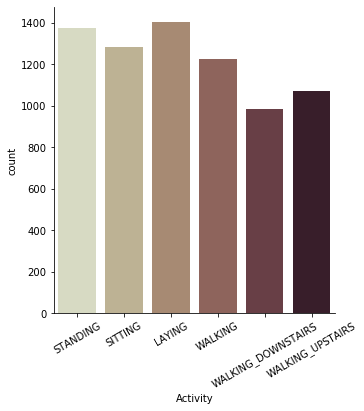

In [10]:
g = sns.catplot(x="Activity", kind="count", palette="ch:.5", data=train)
g.set_xticklabels(rotation=30)

### As we can't visualize more than 3 dim, we need some way to see the relations between each of these features.
### Pairplot is a great way to visualize higher dimention feature relation.
### But as we have 563 features, we can't possibly use pairplot because then we would have to generate
### 563C2 = 158203 number of total plots.
#### But, we can visualize the relation between acceration 3-dir data and gyroscope 3-dir data

# Step 3 : Feature Selection and Feature Engineering.

####  We're using PCA in the pipeline and all data will be normalized using StandardScaler.

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
# Creating the train and test set from the dataframe.

X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test = test.Activity.values.astype(object)

# Printing the dimension of Train and Test set 
print("Dimension X_Train : ",X_train.shape)
print("Dimension X_Test",X_test.shape,"\n")

Dimension X_Train :  (7352, 561)
Dimension X_Test (2947, 561) 



# Building pipeline of different classifiers

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [14]:
encoder = LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)

### Pipeline for logistic regression

In [15]:
pipe_lr = Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=250)),
                     ('lr_classifier',LogisticRegression(random_state=42))])

In [16]:
pipe_RF = Pipeline([ ('pca2', PCA(n_components = 250)),
                     ('rf_classifier', RandomForestClassifier())])

In [17]:
pipe_XG = Pipeline([ ('pca2', PCA(n_components = 250)),
                     ('rf_classifier', XGBClassifier())])

In [18]:
pipe_DT = Pipeline([ ('pca2', PCA(n_components = 250)),
                     ('rf_classifier', DecisionTreeClassifier())])

In [19]:
pipe_KNN = Pipeline([('scaler5', StandardScaler()),
                     ('pca2', PCA(n_components = 250)),
                     ('rf_classifier', KNeighborsClassifier(n_neighbors=6))])

In [20]:
# list of pipelines
pipelines = [pipe_RF, pipe_lr,pipe_XG, pipe_DT,pipe_KNN]

In [21]:
best_accuracy = 0
best_algorithm = 0
best_pipeline = ""

In [22]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forrest', 
             1 : 'Logistic Regression' , 
             2 : 'Logistic Regression' , 
             3 : 'Logistic Regression' , 
             4 : 'Logistic Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)


In [23]:
Y_predicted = pipe.predict(X_test)

In [24]:
from sklearn.metrics import precision_recall_fscore_support as score

scores = []
recalls = []
precisions = []

precision, recall, fscore, support = score(Y_test, Y_predicted)
recalls.append(recall)
recalls.append(recall)
precisions.append(precision)



In [25]:
# # to split the data
# from sklearn.model_selection import train_test_split, KFold, cross_val_score 

# #To evaluate our model
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 


# for name, model in models:
#         kfold = KFold(n_splits=10, random_state=seed)
#         cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
#         print(msg)

## Encoding the categorical feature into neumeric

In [26]:
encoder = LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)


Number of numeric features: 561


## Scaling the features

In [27]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Create the parameter grid based on the results of random search 

parameters = [{'C': [500, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1]}]

# Use of GridsearchCV for automatic hyperparameter tuning

In [29]:
# SVM MODEL with gridsearch 
# n_jobs -1 means use all cpu cores
# cv = 10 means 10 fold cross validation

model_SVM = GridSearchCV(SVC(), 
                         parameters, 
                         scoring='accuracy',
                         cv=10,
                        n_jobs=-1)

model_SVM.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [500, 1000], 'gamma': [0.001, 0.01, 0.1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [30]:
# View the accuracy score
print('Best score for training data:', model_SVM.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',model_SVM.best_estimator_.C,"\n") 
print('Best Kernel:',model_SVM.best_estimator_.kernel,"\n")
print('Best Gamma:',model_SVM.best_estimator_.gamma,"\n")

final_model = model_SVM.best_estimator_

Best score for training data: 0.9479118603963324 

Best C: 500 

Best Kernel: rbf 

Best Gamma: 0.001 



### Confusion matrix for SVC

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.98      0.97       496
           4       0.98      0.93      0.95       420
           5       0.93      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958941


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [500, 1000], 'gamma': [0.001, 0.01, 0.1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)>

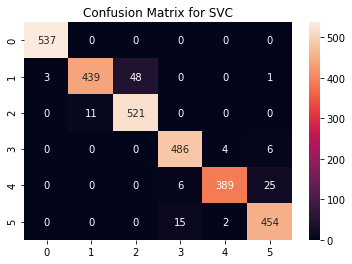

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred_SVC = final_model.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_SVC)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g')
fig.set_title("Confusion Matrix for SVC")
print(classification_report(Y_test,Y_pred_SVC))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))


model_SVM.score